# STAT 201 Project Proposal
## A Look into Salaries and Remote Work in the Data Science Field

## Introduction

### Background
Monetary compensation is a one of the key factors in employees’ response to job satisfaction questions along with education matching the role of an employee (Card et al., 2012; Lee & Sabharwal, 2014)

This serves as the motivation for this project with the goal being to provide open information about compensation and factors that can contribute to the amount of compensation those in the data science field can expect to receive. While this can be used for monetary gain, the root problem we hope to contribute to using this statistical analysis is to increase workplace satisfaction. At its heart, this project is meant for both employees and employers who can benefit from greater job satisfaction; this can create a work environment that is productive for employees (and employers to a certain extent) in and out of the workplace by influencing work-life balance. 


### Guiding Question
> Comparing full-time Data Analysts and Data Scientists, is there a *difference in medians* of salaries and *difference of proportions* of remote work?

### Dataset

We sourced the data used in this project from [Kaggle](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries). This data was aggregated by [ai-jobs.net](ai-jobs.net), and contains both qualitative and quantitative observations we can harness, like the year the salary was paid, experience level, employment type, title, salary, remote ratio, company size, and company location.

Together, these variables help us achieve a more complete picture of the job market in the Data Science field.

## Preliminary Results

### Reading the Data

Kaggle does not allow datasets to be referenced directly from the website.

As a result, we downloaded the data to our repository, and referenced it here.

In [1]:
# TODO- MAKE SURE WE ARE USING ALL OF THESE DEPENDENCIES AND IF NOT, DELETE THE UNNEEDED ONES
library(tidyverse)
library(broom)
library(repr)
library(digest)
library(infer)
library(gridExtra)

# reading the data
salaries_data <- read.csv("https://raw.githubusercontent.com/ryanarnouk/stat-201-project/main/ds_salaries.csv") %>%
     select(!X)

# preview the data
head(salaries_data)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>
1,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
2,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
3,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
4,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
5,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
6,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L


### Cleaning and Wrangling Data

Since we are only comparing full-time Data Analysts and Data Scientists, we can filter out the unnecessary observations and select the columns we need.

We should also recode the ```remote_ratio``` values, so that they are more readable. The dataset uses numbers to specify meaning but we can change this to a text representation. 

In [2]:
salaries <- salaries_data %>%
    filter(employment_type == "FT", job_title %in% c("Data Analyst", "Data Scientist")) %>%
    select(job_title, remote_ratio, salary_in_usd) %>%
    mutate(remote_ratio = recode(remote_ratio, `0` = "in_person", `50` = "hybrid", `100` = "remote"))

head(salaries)

,job_title,remote_ratio,salary_in_usd
,<chr>,<chr>,<int>
1,Data Scientist,in_person,79833
2,Data Analyst,remote,72000
3,Data Scientist,hybrid,35735
4,Data Scientist,in_person,51321
5,Data Scientist,in_person,40481
6,Data Scientist,in_person,39916


In [3]:
med_salary <- salaries %>%
    select(job_title, salary_in_usd) %>%
    group_by(job_title) %>%
    summarize(n = n(),
              med_salary = median(salary_in_usd),
              sd_salary = sd(salary_in_usd))

head(med_salary)

prop_remote <- salaries %>%
    select(job_title, remote_ratio) %>%
    group_by(job_title) %>%
    summarize(n = n(), 
              prop_remote = mean(remote_ratio == "remote"))

head(prop_remote)

job_title,n,med_salary,sd_salary
<chr>,<int>,<dbl>,<dbl>
Data Analyst,96,90660,39258.60
Data Scientist,140,104796,64372.43


job_title,n,prop_remote
<chr>,<int>,<dbl>
Data Analyst,96,0.7291667
Data Scientist,140,0.5571429


### Plots

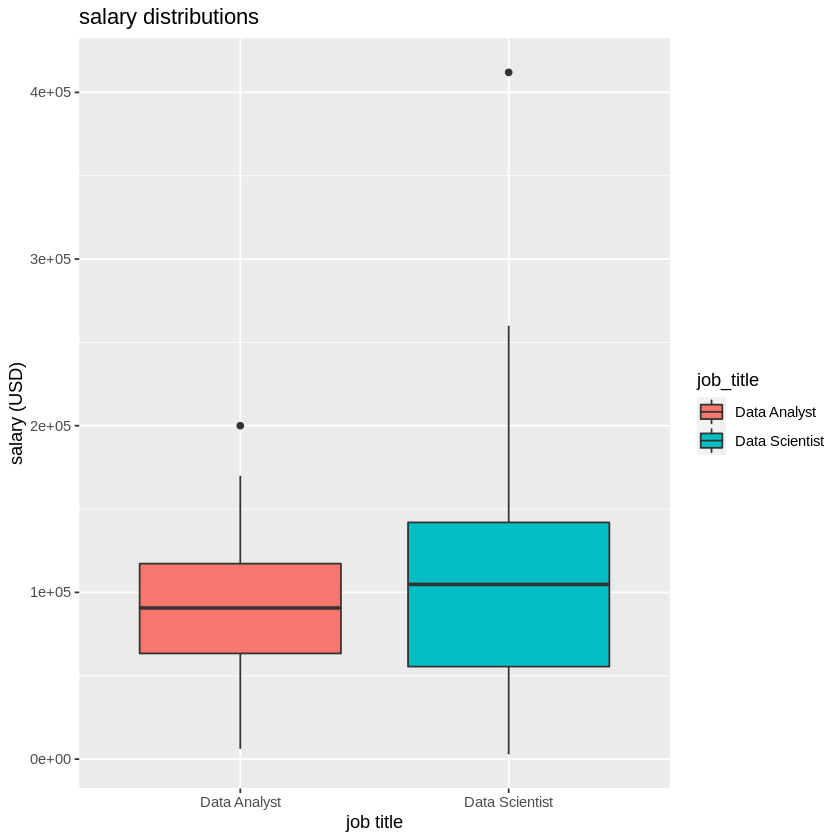

In [4]:
salaries_dist <- salaries %>%
    filter(job_title %in% c("Data Scientist", "Data Analyst")) %>%
    ggplot() +
    geom_boxplot(aes(x = job_title, y = salary_in_usd, fill = job_title)) +
    labs(x = "job title", y = "salary (USD)", title = "salary distributions")

salaries_dist

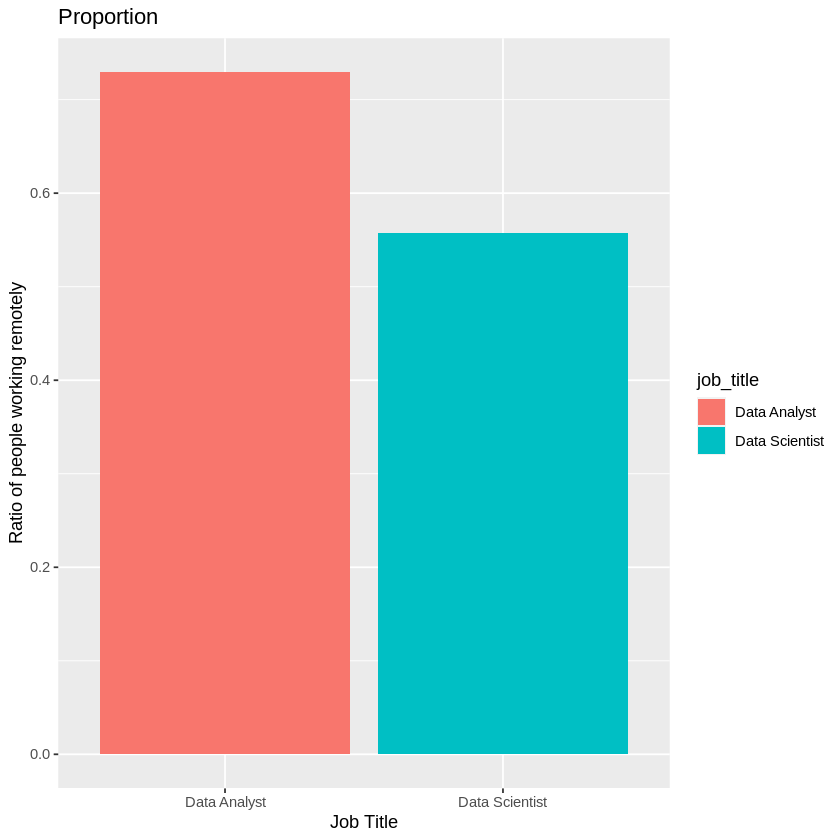

In [5]:
prop_remote_boxplot <- 
    prop_remote %>%
    ggplot() +
    geom_col(aes(x = job_title, y = prop_remote, fill = job_title)) +
    labs(x = "Job Title", y = "Ratio of people working remotely", title = "Proportion")

prop_remote_boxplot

### Estimates

## Methods: Plan

### Expected Outcomes and Significance

### Future

With the observations we are analyzing and comparing, we are only scratching the surface of all that there is to be examined. The possibilities are endless. For example, another question worth answering with this same dataset is how does remote ratio affect salary? 

We hope further research can be conducted comparing different variables further along with assessment on how salary impacts wellbeing and job satisfaction for both parties (the employer and employee) and along multiple industries.

## References

Card, D., Mas, A., Moretti, E., & Saez, E. (2012). Inequality at Work: The Effect of Peer Salaries on Job Satisfaction. American Economic Review, 102(6), 2981–3003. https://doi.org/10.1257/aer.102.6.2981

Lee, Y., & Sabharwal, M. (2014). Education–Job Match, Salary, and Job Satisfaction Across the Public,, Non-Profit, and For-Profit Sectors: Survey of recent college graduates. Public Management Review, 18(1), 40–64. https://doi.org/10.1080/14719037.2014.957342